# Importacion de librerias

In [4]:
#recordar crear un enviroment

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

# LECTURAS DATOS

In [63]:
df = pd.read_csv('2017_preprocesado.csv')

In [64]:
df.head()

,Timesteps,bx_gsm,by_gsm,bz_gsm,bt,Kp
0,2017-01-01 00:00:00,-4.384540,0.151482,-2.747153,5.864738,3.333
1,2017-01-01 03:00:00,-2.083439,-0.208964,-2.461775,5.662317,3.667
2,2017-01-01 06:00:00,-1.154902,0.917093,-1.160736,4.204290,2.667
3,2017-01-01 09:00:00,-0.272552,-0.552822,-0.523117,4.356062,2.333
4,2017-01-01 12:00:00,1.430231,2.103350,-0.312276,4.290185,2.333


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timesteps  2920 non-null   object 
 1   bx_gsm     2920 non-null   float64
 2   by_gsm     2920 non-null   float64
 3   bz_gsm     2920 non-null   float64
 4   bt         2920 non-null   float64
 5   Kp         2920 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.0+ KB


In [66]:
df.describe()

,bx_gsm,by_gsm,bz_gsm,bt,Kp
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,-0.252071,0.334354,-0.027766,5.228797,1.884579
std,3.081714,3.074265,1.970322,2.492265,1.350691
min,-11.596388,-12.461735,-19.024028,0.819971,0.000000
25%,-2.575870,-1.833601,-0.896918,3.645149,0.667000
50%,-0.404768,0.374954,-0.031420,4.563906,1.667000
75%,2.138219,2.230784,0.810613,6.211552,2.667000
max,11.728493,18.527851,15.093244,22.041329,8.333000


**Set Date column as an index**

In [67]:
df['Timesteps'] = pd.to_datetime(df['Timesteps'])
df.set_index('Timesteps', inplace= True)

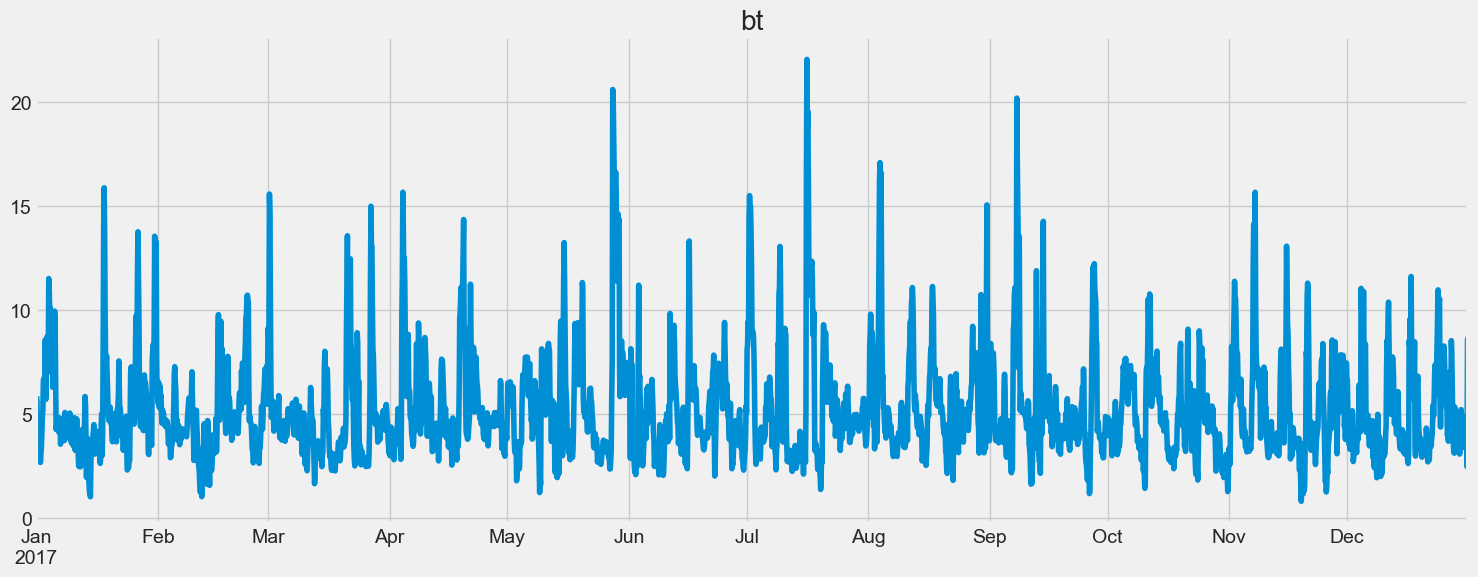

In [68]:
plt.figure(figsize=(15, 6))
df['bt'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("bt")
plt.tight_layout()
plt.show()

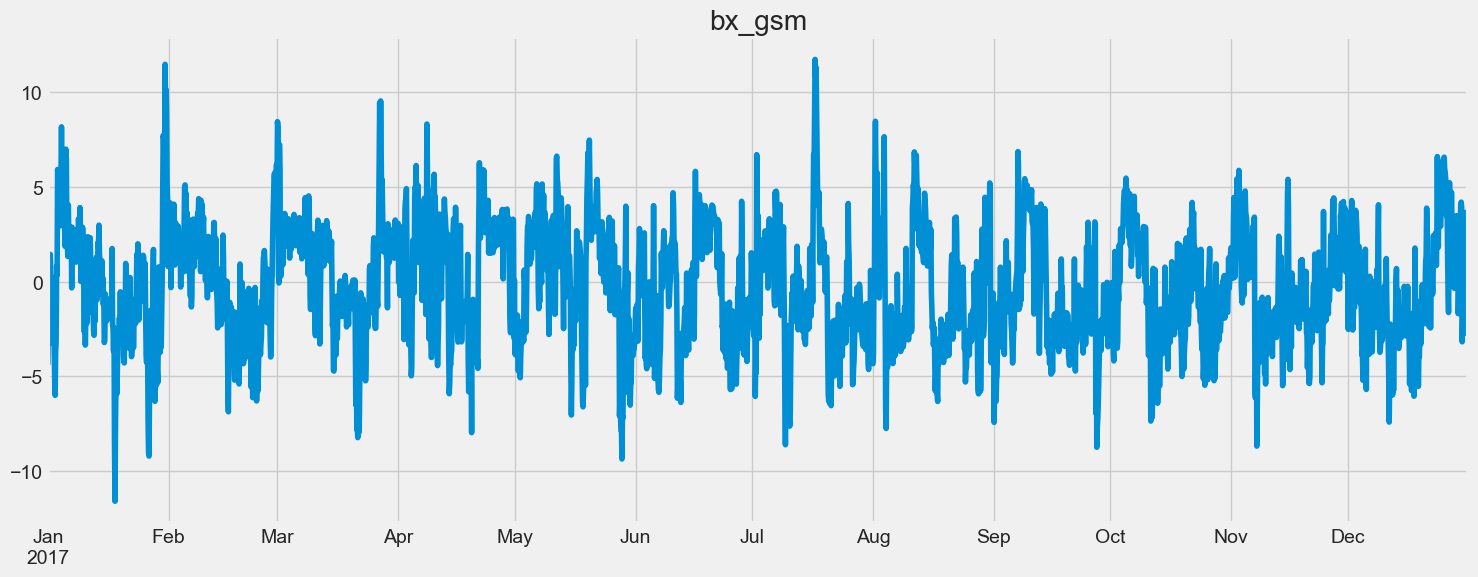

In [69]:
plt.figure(figsize=(15, 6))
df['bx_gsm'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("bx_gsm")
plt.tight_layout()
plt.show()


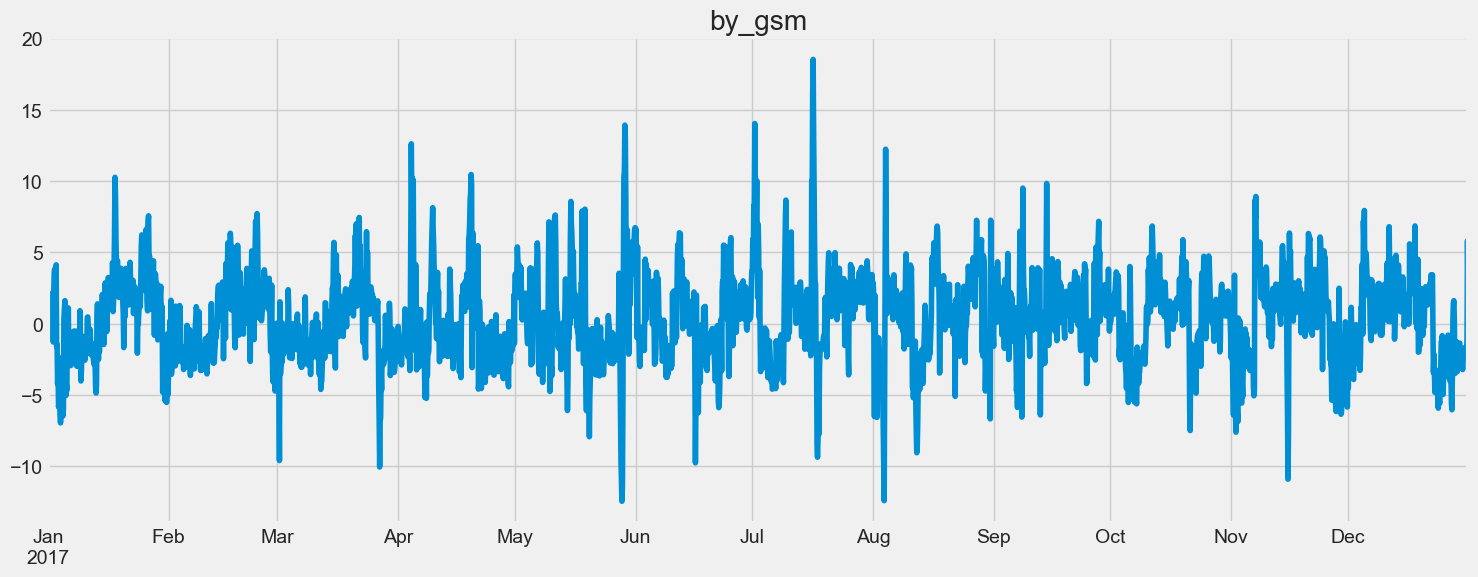

In [70]:
plt.figure(figsize=(15, 6))
df['by_gsm'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("by_gsm")
plt.tight_layout()
plt.show()

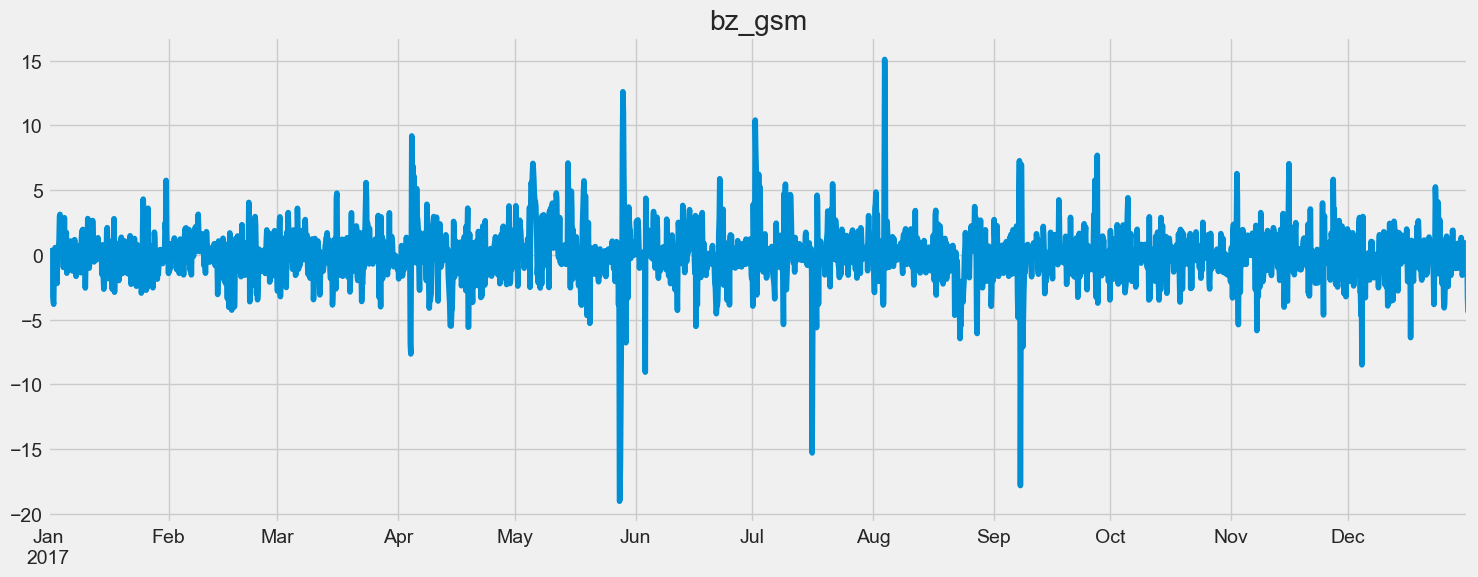

In [71]:
plt.figure(figsize=(15, 6))
df['bz_gsm'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("bz_gsm")
plt.tight_layout()
plt.show()

# Data Preprocessing

**Choosing Prediction Column**

In [72]:
n_cols = 1
dataset = df["Kp"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2920, 1)

In [78]:
data

array([[3.333],
       [3.667],
       [2.667],
       ...,
       [0.667],
       [1.333],
       [2.   ]])

**Normalizing Data**

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

**Splitting Data**

In [74]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2190 Test Size : 730


In [75]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2190, 1)

**Creating training set**

In [77]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)
        

X_train:  [array([[0.399976 ],
       [0.4400576],
       [0.3200528],
       [0.2799712],
       [0.2799712],
       [0.3600144],
       [0.2400096],
       [0.200048 ],
       [0.200048 ],
       [0.2799712],
       [0.2400096],
       [0.200048 ],
       [0.1599664],
       [0.2400096],
       [0.0399616],
       [0.0800432],
       [0.0399616],
       [0.200048 ],
       [0.2400096],
       [0.4400576],
       [0.3200528],
       [0.3600144],
       [0.3200528],
       [0.3200528],
       [0.1200048],
       [0.200048 ],
       [0.1599664],
       [0.2400096],
       [0.2799712],
       [0.2799712],
       [0.4400576],
       [0.399976 ],
       [0.399976 ],
       [0.399976 ],
       [0.2400096],
       [0.2400096],
       [0.3600144],
       [0.4400576],
       [0.4400576],
       [0.4800192],
       [0.4400576],
       [0.4400576],
       [0.3200528],
       [0.2799712],
       [0.3200528],
       [0.3200528],
       [0.3200528],
       [0.3600144],
       [0.4400576],
       [0

In [50]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [52]:
x_train.shape , y_train.shape

((2860, 60, 1), (2860, 1))

# LSTM Model

**Model Structure**

In [53]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    #Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [54]:
early_stopping = EarlyStopping(monitor='mean_absolute_error',patience=5,verbose=1,restore_best_weights=True)

**Model Training**

In [55]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32,callbacks=[early_stopping])#agregar Eartlysto

Epoch 1/100
90/90 [==============================] - 4s 21ms/step - loss: 0.0204 - mean_absolute_error: 0.1099
Epoch 2/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0146 - mean_absolute_error: 0.0945
Epoch 3/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0128 - mean_absolute_error: 0.0887
Epoch 4/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0118 - mean_absolute_error: 0.0845
Epoch 5/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0112 - mean_absolute_error: 0.0829
Epoch 6/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0106 - mean_absolute_error: 0.0802
Epoch 7/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0103 - mean_absolute_error: 0.0791
Epoch 8/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0102 - mean_absolute_error: 0.0786
Epoch 9/100
90/90 [==============================] - 2s 21ms/step - loss: 0.0103 - mean_absolute_error: 0.0792
E

# Model Evaluation

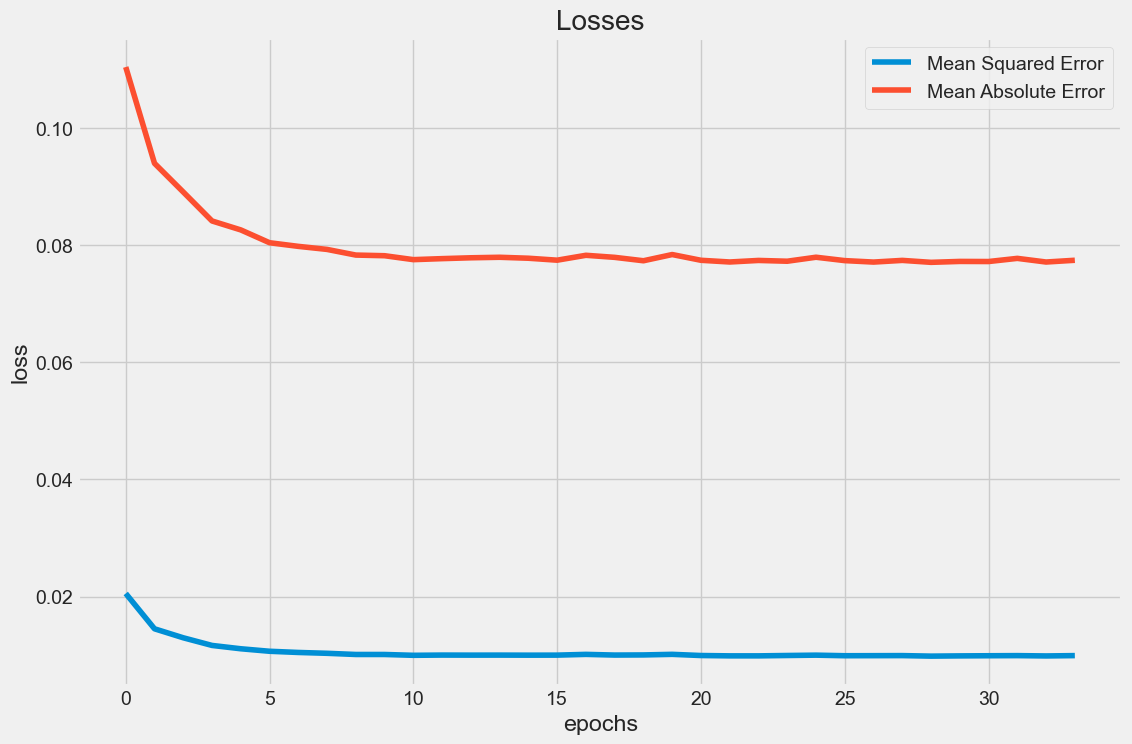

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

**Creating testing set**

In [56]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]
print(test_data)

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):

    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

[[0.0800432]
 [0.0800432]
 [0.1200048]
 [0.200048 ]
 [0.2799712]
 [0.3200528]
 [0.2799712]
 [0.2799712]
 [0.1200048]
 [0.0800432]
 [0.0399616]
 [0.0399616]
 [0.0399616]
 [0.0399616]
 [0.0399616]
 [0.0800432]
 [0.1599664]
 [0.1200048]
 [0.0399616]
 [0.       ]
 [0.0399616]
 [0.2400096]
 [0.3600144]
 [0.3200528]
 [0.5600624]
 [0.4800192]
 [0.4400576]
 [0.4400576]
 [0.6800672]
 [0.7599904]
 [0.6399856]
 [0.7599904]
 [0.800072 ]
 [0.5600624]
 [0.4400576]
 [0.4800192]
 [0.4400576]
 [0.5600624]
 [0.3600144]
 [0.2799712]
 [0.2799712]
 [0.3200528]
 [0.399976 ]
 [0.200048 ]
 [0.2400096]
 [0.3200528]
 [0.2400096]
 [0.3200528]
 [0.399976 ]
 [0.2400096]
 [0.399976 ]
 [0.4800192]
 [0.2799712]
 [0.3600144]
 [0.399976 ]
 [0.200048 ]
 [0.3200528]
 [0.2400096]
 [0.200048 ]
 [0.399976 ]
 [0.200048 ]
 [0.3600144]
 [0.1599664]
 [0.399976 ]
 [0.1599664]
 [0.200048 ]
 [0.1599664]
 [0.0399616]
 [0.0399616]
 [0.       ]
 [0.2799712]
 [0.3600144]
 [0.3200528]
 [0.1200048]
 [0.       ]
 [0.0399616]
 [0.0399616]

In [27]:
predictions = model.predict(x_test)

23/23 [==============================] - 1s 8ms/step


In [28]:
predictions.shape

(730, 1)

In [29]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(730, 1)

**Root mean square error**

In [31]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [32]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

12.51

In [33]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,2.986054,13.891111
1,1.994751,24.999000
2,2.861158,11.107889
3,1.769820,27.773889
4,3.038632,11.107889
...,...,...
725,0.427784,2.774889
726,0.617628,2.774889
727,0.651468,5.558111
728,0.900769,11.107889


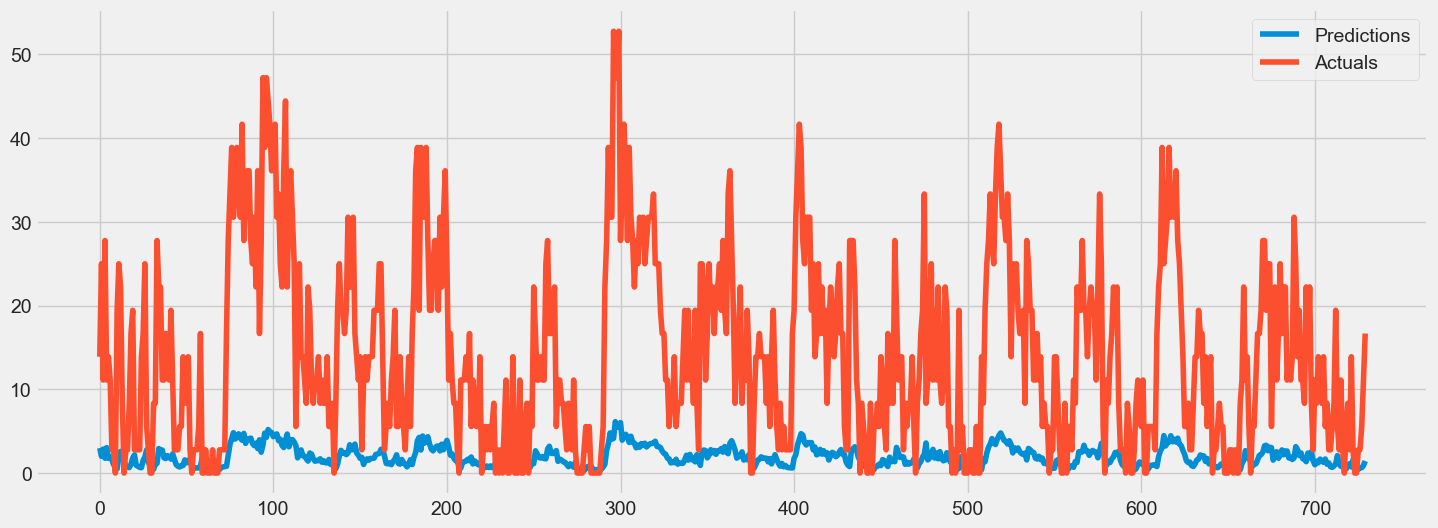

In [34]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

**Visualize Predictions with The Data**

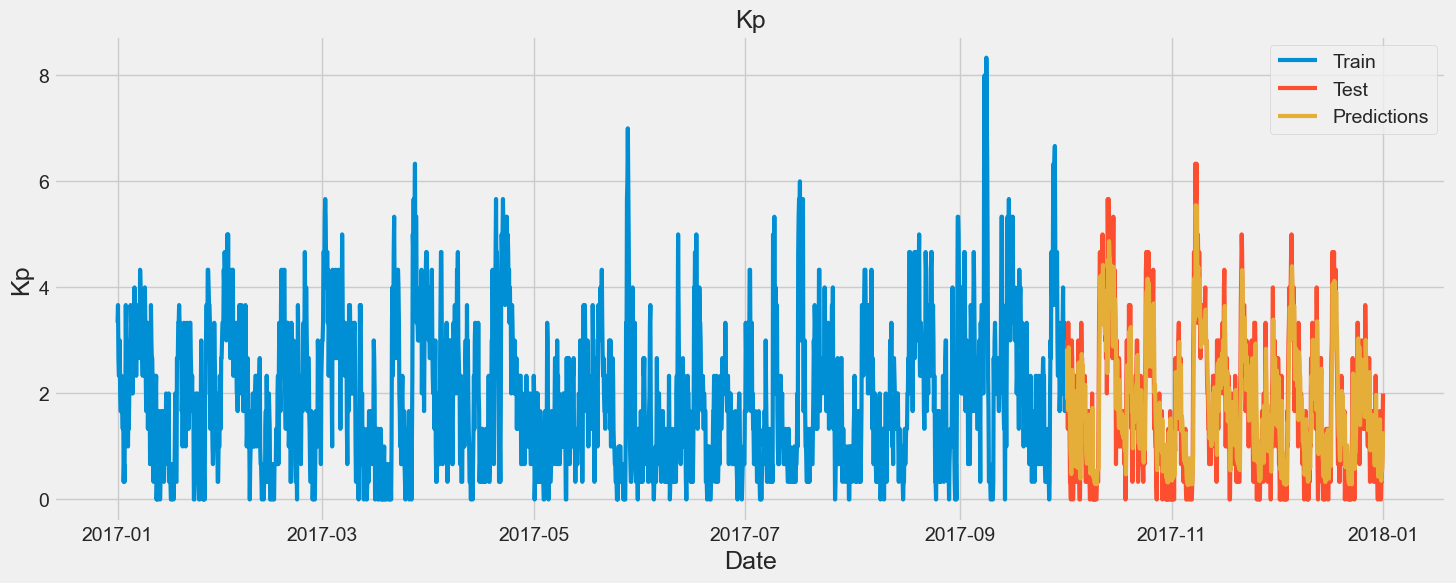

In [156]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Kp', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Kp', fontsize= 18)
plt.plot(train['Kp'], linewidth= 3)
plt.plot(test['Kp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])